In [15]:
#new code Fall 2024

In [16]:
#installations
!pip install pandas
!pip install numpy

In [17]:
#imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold

In [18]:
#data
data=pd.read_excel("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Data_new.xlsx")

#remove rows with NA entries
data=data.dropna() 

data.shape

(1340, 44)

In [20]:
data.head()

,Group,Group1,Group2,TypeOfForce,OfficerThreat,OfficerPatDown,OfficerFirmGrip,OfficerPainCompliance,OfficerControlledPushThrow,OfficerUncontrolledPushThrow,...,Unknown_Seriousness_Subjects_offense,PQ3,PQ4,PQ5,PQ6,PQ7,PQ8,PQ9,PQ10,PQ11
0,1,1,0,5.0,0,0,0,0,1,0,...,0,3.0,3.0,5.0,2.0,1.0,2.0,1.0,1.0,2.0
1,2,0,1,17.0,0,0,0,0,0,0,...,1,3.0,4.0,2.0,10.0,4.0,2.0,2.0,1.0,1.0
2,2,0,1,8.0,0,0,0,0,0,0,...,1,9.0,9.0,1.0,5.0,1.0,3.0,5.0,4.0,5.0
3,2,0,1,16.0,0,0,0,0,0,0,...,1,4.0,5.0,4.0,5.0,6.0,0.0,2.0,2.0,2.0
4,1,1,0,1.0,1,0,0,0,0,0,...,0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


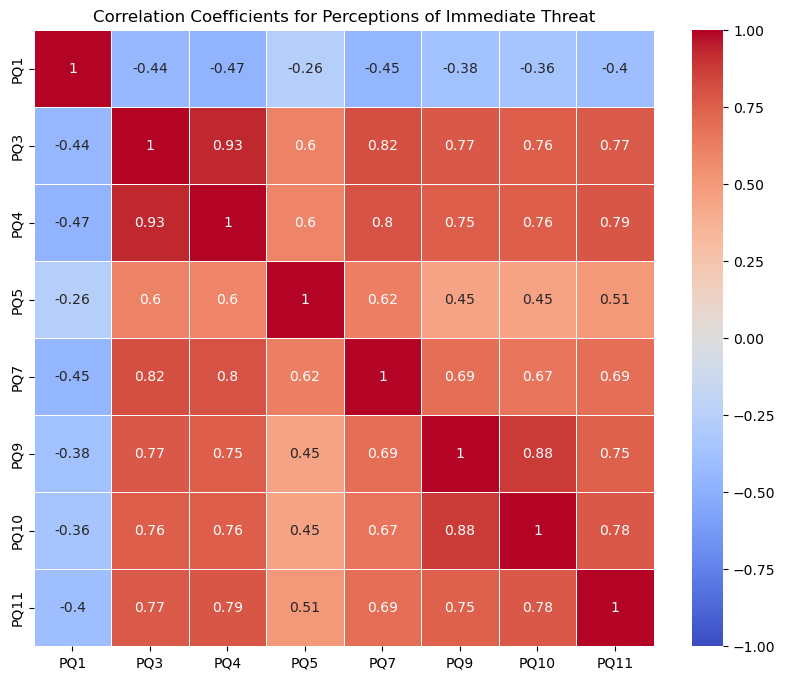

In [5]:
#visualize correlation coefficient matrix for PQs measuring immediate threat posed subject
PQs_df = data[['PQ1','PQ3','PQ4','PQ5','PQ7','PQ9','PQ10','PQ11']]
spearman_corr = PQs_df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Coefficients for Perceptions of Immediate Threat')
plt.show()

In [ ]:
#run factor analysis to group PQs (start with model containing all possible factors)

In [6]:
PQs_df.head()

,PQ1,PQ3,PQ4,PQ5,PQ7,PQ9,PQ10,PQ11
0,7.0,3.0,3.0,5.0,1.0,1.0,1.0,2.0
1,2.0,3.0,4.0,2.0,4.0,2.0,1.0,1.0
2,1.0,9.0,9.0,1.0,1.0,5.0,4.0,5.0
3,1.0,4.0,5.0,4.0,6.0,2.0,2.0,2.0
4,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
#run KMO test to see if PQs_df is suitable for factor analysis (it is - close to 1)
!pip install factor-analyzer

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer

In [8]:
calculate_kmo(PQs_df)

(array([0.94497217, 0.86830196, 0.8744741 , 0.96616842, 0.95243725,
        0.89101368, 0.8843997 , 0.96549475]),
 0.9085960687130664)

In [9]:
#construct factor model 

#rotation : varimax, quartimax, equamax (orthogonal)
#rotation : promax, direct oblimin, oblimax, quartimin (non-orthogonal)

factor_model = FactorAnalyzer(n_factors=8, rotation='quartimin')
factor_model.fit(PQs_df)

FactorAnalyzer(n_factors=8, rotation='quartimin', rotation_kwargs={})

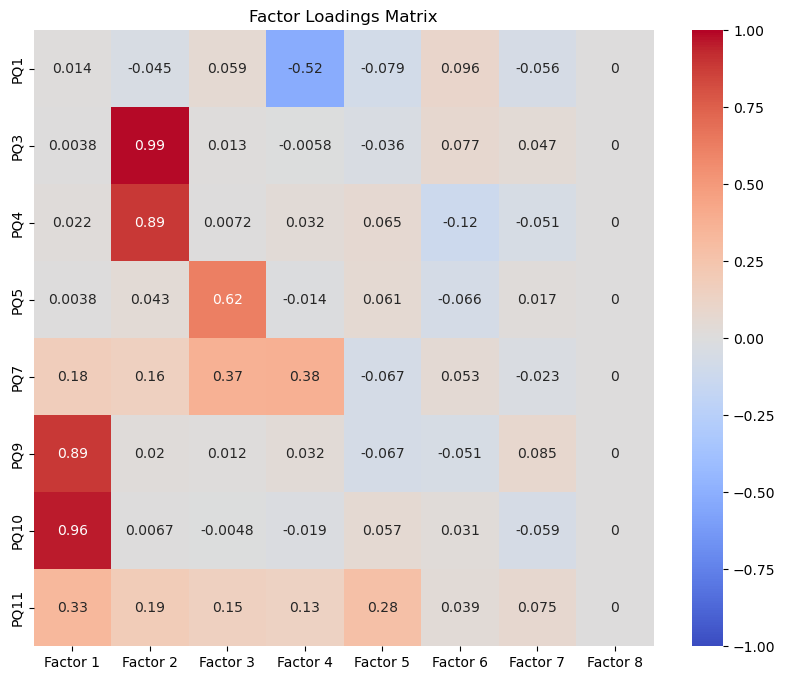

In [10]:
#obtain the loadings of each variable on each factor 
loadings = factor_model.loadings_
loadings_df = pd.DataFrame(loadings, index=PQs_df.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Factor Loadings Matrix')
plt.show()

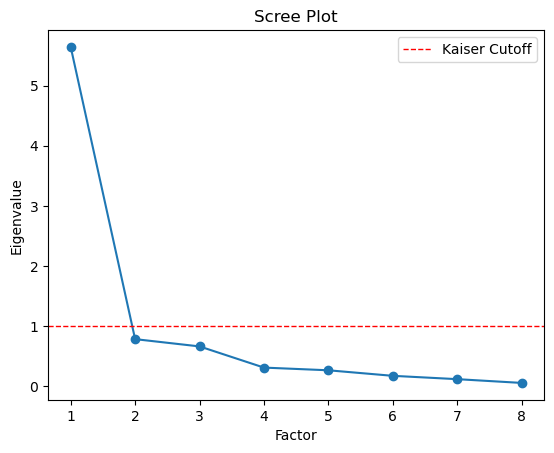

In [63]:
#obtain the scree plot of the variance explained by each factor (eigenvalues)
ev, v = factor_model.get_eigenvalues()
plt.plot(range(1, PQs_df.shape[1] + 1), ev, marker='o')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1, label='Kaiser Cutoff')
plt.legend()
plt.show()

#by Kaisser criterion, we only should utilize 2 factors

In [64]:
ev

array([5.64370068, 0.78191533, 0.66091039, 0.3085485 , 0.26370477,
       0.17163774, 0.11609527, 0.05348731])

In [65]:
factor_model_reduced = FactorAnalyzer(n_factors=2, rotation='quartimin')
factor_model_reduced.fit(PQs_df)

FactorAnalyzer(n_factors=2, rotation='quartimin', rotation_kwargs={})

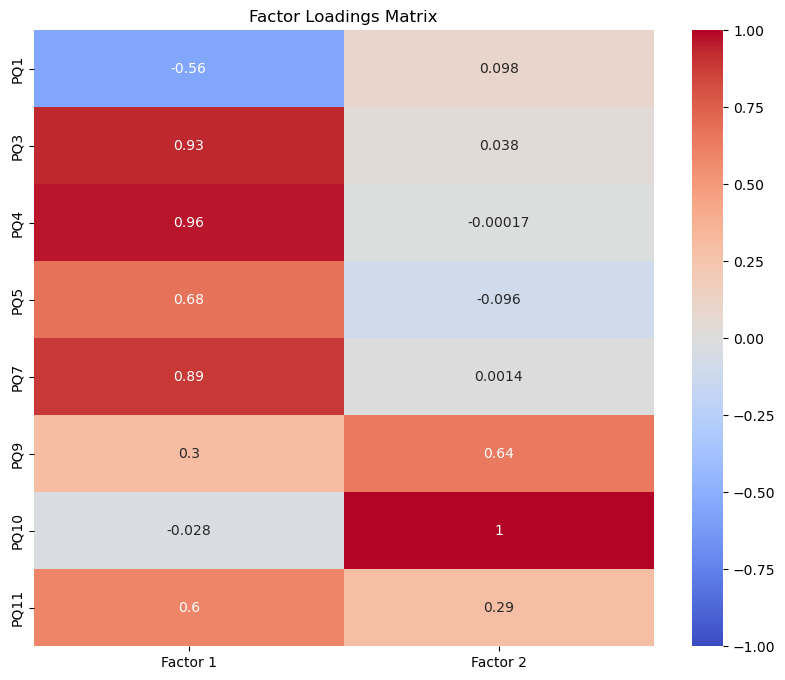

In [66]:
#obtain the loadings of each variable on each factor 
loadings = factor_model_reduced.loadings_
loadings_df = pd.DataFrame(loadings, index=PQs_df.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Factor Loadings Matrix')
plt.show()

In [ ]:
#assess model fit (accuracy of factor loadings)

In [ ]:
#split PQs_df into training and testing sets to compare fitted factor scores to predicted factor scores
from sklearn.model_selection import train_test_split
train_PQs, test_PQs = train_test_split(PQs_df, test_size=0.259) 

In [ ]:
#obtain list of predicted factor scores from 5-fold CV on training set

In [ ]:
train_PQs = train_PQs.reset_index(drop=True)

In [ ]:
predicted_scores_CV = []

In [ ]:
for i in range(1,6,1):

    test_fold_i = train_PQs.iloc[200*i - 200 : 200*i, :]
    test_indices = train_PQs.index[200*i - 200 : 200*i]
    train_fold_i = train_PQs.drop(test_indices)
    
    factormodel_i = FactorAnalyzer(n_factors=4, rotation='varimax')
    factormodel_i.fit(train_fold_i)
    
    loadings_fold_i = factormodel_i.loadings_
    factormodel_i_scores = np.dot(test_fold_i, loadings_fold_i)
    
    predicted_scores_CV.append(factormodel_i_scores)
    
predicted_scores_CV_df = pd.concat([pd.DataFrame(scores) for scores in predicted_scores_CV], ignore_index=True)
predicted_scores_CV_df.columns = ["F1 CV Scores", "F2 CV Scores","F3 CV Scores","F4 CV Scores"]
predicted_scores_CV_df

In [ ]:
#obtain list of predicted scores on test set

In [ ]:
factormodel_test_set=FactorAnalyzer(n_factors=4, rotation='varimax')
factormodel_test_set.fit(test_PQs)
loadings_test_set = factormodel_test_set.loadings_
factormodel_test_scores = np.dot(train_PQs, loadings_test_set)
factormodel_test_scores_df = pd.DataFrame(factormodel_test_scores, columns=["F1 Test Scores", "F2 Test Scores","F3 Test Scores","F4 Test Scores"])
factormodel_test_scores_df

In [ ]:
#construct data frames to compare scores
F1_scores = pd.concat([predicted_scores_CV_df[['F1 CV Scores']], factormodel_test_scores_df[['F1 Test Scores']]], axis=1)
F2_scores = pd.concat([predicted_scores_CV_df[['F2 CV Scores']], factormodel_test_scores_df[['F2 Test Scores']]], axis=1)
F3_scores = pd.concat([predicted_scores_CV_df[['F3 CV Scores']], factormodel_test_scores_df[['F3 Test Scores']]], axis=1)
F4_scores = pd.concat([predicted_scores_CV_df[['F4 CV Scores']], factormodel_test_scores_df[['F4 Test Scores']]], axis=1)

In [ ]:
#compare both sets of scores using correlation coefficient 
F1_correlation = F1_scores['F1 CV Scores'].corr(F1_scores['F1 Test Scores'],method='spearman')
print(f"Spearman's Correlation Coefficient for F1 Scores: {F1_correlation}")

In [ ]:
F2_correlation = F2_scores['F2 CV Scores'].corr(F2_scores['F2 Test Scores'],method='spearman')
print(f"Spearman's Correlation Coefficient for F2 Scores: {F2_correlation}")

In [ ]:
F3_correlation = F3_scores['F3 CV Scores'].corr(F3_scores['F3 Test Scores'],method='spearman')
print(f"Spearman's Correlation Coefficient for F3 Scores: {F3_correlation}")

In [ ]:
#compare both sets of scores using correlation coefficient 
F4_correlation = F4_scores['F4 CV Scores'].corr(F4_scores['F4 Test Scores'],method='spearman')
print(f"Spearman's Correlation Coefficient for F4 Scores: {F4_correlation}")

In [ ]:
#based on our results, our loadings are good estimates 

In [ ]:
#pre-processing

In [1626]:
#data
data=pd.read_excel("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Data_new.xlsx")

#remove rows with NA entries
data=data.dropna() 

data.shape

(1340, 44)

In [1627]:
#remove Group variable
data = data.drop('Group',axis=1)
data.columns

Index(['Group1', 'Group2', 'TypeOfForce', 'OfficerThreat', 'OfficerPatDown',
       'OfficerFirmGrip', 'OfficerPainCompliance',
       'OfficerControlledPushThrow', 'OfficerUncontrolledPushThrow',
       'OfficerLVNR', 'OfficerStrikeHandsFeet', 'OfficerStrikeInstrument',
       'OfficerTaser', 'OfficerPepperSpray', 'OfficerFirearmDrawn',
       'OfficerFirearmUsed', 'OfficerDisplaysNonLethal', 'OfficersPresent',
       'Resistance', 'SubjectResisted', 'StateOfControl', 'SuspectArmed',
       'SubjectArmedBinary', 'DeEscalation', 'OverallAssessment',
       'OfficerSilentAfterForce', 'OfficerReassuringAfterForce',
       'OfficerAnnoyedAfterForce', 'OfficerAngryAfterForce',
       'DetainCiteArrest', 'SubjectDetainedBinary', 'PQ1', 'PQ2',
       'Unknown_Seriousness_Subjects_offense', 'PQ3', 'PQ4', 'PQ5', 'PQ6',
       'PQ7', 'PQ8', 'PQ9', 'PQ10', 'PQ11'],
      dtype='object')

In [1628]:
#remove rows in TypeOfForce with entries = 11, 16, 17
data = data[~data['TypeOfForce'].isin([11, 16, 17])]
data.shape

(1144, 43)

In [1361]:
#remove 0's from PQ2 ??
#data = data[data['PQ2'] != 0]
#data.shape

In [1629]:
#update data with only columns of interest
data_for_SVM = data[['Group1','Group2','OfficerThreat','OfficerPatDown','OfficerPainCompliance','OfficerControlledPushThrow',
                     'OfficerUncontrolledPushThrow','OfficerLVNR','OfficerStrikeHandsFeet','OfficerStrikeInstrument','OfficerTaser',
                     'OfficerPepperSpray','OfficerFirearmDrawn','OfficerFirearmUsed','OfficerDisplaysNonLethal','OfficersPresent',
                     'SubjectResisted','StateOfControl','SubjectArmedBinary','DeEscalation','SubjectDetainedBinary',
                     'OfficerSilentAfterForce','OfficerReassuringAfterForce','OfficerAnnoyedAfterForce','OfficerAngryAfterForce',
                     'PQ1','PQ2','Unknown_Seriousness_Subjects_offense','PQ3','PQ5','PQ6','PQ7','PQ8','PQ10','PQ11']]
data_for_SVM.shape

(1144, 35)

In [1529]:
#binarize response PQ8
#data_for_SVM.loc[data_for_SVM['PQ8'] != 2, 'PQ8'] = 0
#data_for_SVM.loc[data_for_SVM['PQ8'] == 2, 'PQ8'] = 1
#data_for_SVM['PQ8']

In [1630]:
#split data into groups 
Group1_data = data_for_SVM[data_for_SVM['Group1'] == 1]
Group2_data = data_for_SVM[data_for_SVM['Group1'] == 0]

In [1631]:
Group1_data = Group1_data.drop(columns=['Group1','Group2'])
Group2_data = Group2_data.drop(columns=['Group1','Group2'])

In [1272]:
#Group1_data.shape

In [1619]:
#create dictionary for model paramters to iterate through
from sklearn import svm, datasets
model_SVC = svm.SVC()
import itertools
import time
from sklearn.metrics import matthews_corrcoef

parameters = {'kernel':['linear','rbf','sigmoid','poly'],'C':[0.001,0.01,0.1,0.3,0.5,0.7], 'gamma':[0.001,0.01,0.1,0.3,0.5,0.7],'degree':[2,3]}
cv_result_dict={'params' : list(itertools.product(*[parameters[k] for k in parameters])),
               'fold_1_predictions':[],
               'fold_2_predictions':[],
               'fold_3_predictions':[],
               'fold_4_predictions':[],
               'fold_5_predictions':[]}

In [1632]:
#test cutoff 
cutoff = 3
Group2_data.loc[Group2_data['PQ6'] <= cutoff, 'PQ6'] = 0
Group2_data.loc[Group2_data['PQ6'] > cutoff, 'PQ6'] = 1

In [1621]:
Group2_data = Group2_data.reset_index(drop=True)

In [1622]:
#run 5-fold CV on all combinations of models
folds = 5

for param in cv_result_dict['params'] : #for each combination of model parameters
    this_model = svm.SVC(kernel = param[0], C = param[1], gamma = param[2], degree = param[3]) #define the current model
    for i in range(1,folds+1,1): #for ith fold
        curr_split_test_data=Group2_data.iloc[(i)*115-115:(i)*115,:] #define the ith fold as the testing set
        curr_split_train_data=Group2_data.loc[Group2_data.index.difference(curr_split_test_data.index)] #define the other i-1 fold as the training set
        this_model.fit(curr_split_train_data.drop(columns=['PQ6']),curr_split_train_data['PQ6']), #fit our model to the training set
        pred=this_model.predict(curr_split_test_data.drop(columns=['PQ6'])) #test our model on testing set (and store predictions)
        cv_result_dict['fold_{}_predictions'.format(i)].append(pred)

In [1623]:
#put model predictions from gridsearch in a data frame
cv_result_table=pd.DataFrame(cv_result_dict)

In [1624]:
#store MCC scores for each model in grid search
from sklearn.metrics import matthews_corrcoef
true_responses = Group2_data['PQ6']
model_MCC_score = []

for j in range(len(cv_result_table)) : #for each model in gridsearch
    model_j_predictions = [] 
    for k in range(1,6,1):
        model_j_predictions.extend(cv_result_table.iloc[j,k].flatten().tolist()) #obtain model predictions 
    model_j_MCC = matthews_corrcoef(true_responses,model_j_predictions) #compute MCC between preds & true PQ2 responses
    model_MCC_score.append(model_j_MCC)

model_performance_scores = pd.DataFrame(columns=['Model','MCC'])
model_performance_scores['Model'] = cv_result_table[['params']]
model_performance_scores['MCC'] = model_MCC_score

In [1625]:
#identify model that produces the max MCC for cutoff
pd.set_option('display.max_rows', None)
top_MCC_models = model_performance_scores.nlargest(50, 'MCC')
top_MCC_models

,Model,MCC
60,"(linear, 0.7, 0.001, 2)",0.602140
61,"(linear, 0.7, 0.001, 3)",0.602140
62,"(linear, 0.7, 0.01, 2)",0.602140
63,"(linear, 0.7, 0.01, 3)",0.602140
64,"(linear, 0.7, 0.1, 2)",0.602140
65,"(linear, 0.7, 0.1, 3)",0.602140
66,"(linear, 0.7, 0.3, 2)",0.602140
67,"(linear, 0.7, 0.3, 3)",0.602140
68,"(linear, 0.7, 0.5, 2)",0.602140
69,"(linear, 0.7, 0.5, 3)",0.602140


In [318]:
#once selected the highest performing model for all predictors on PQ2, perform variable dropping to determine impact
#of each predictor on PQ2 in a given Group 

In [1633]:
X = Group2_data.drop(columns=['PQ1','PQ2','PQ3','PQ5','PQ6','PQ7','PQ8','PQ10','PQ11'])
y = Group2_data['PQ6']

In [1634]:
#split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [1635]:
#reindex indices of test data from 0 
X_test = X_test.reset_index()
del X_test['index']
y_test = y_test.reset_index()
del y_test['index']

#store best model from grid search
from sklearn import svm, datasets
model_SVC = svm.SVC()
import itertools
import time
from sklearn.metrics import matthews_corrcoef

bestmodel = svm.SVC(kernel='linear',C=0.7)#, gamma = 0.01, degree = 3)

#dropping variables to select predictors for best model

#initialize max_MCC_score list
max_MCC_score=[]

#initialize predictor_removed list
predictor_removed=[]

#initialize number of predictors list
num_predictors=[]

while len(num_predictors)!=23: 

    #initialize MCC_score list
    MCC_score=[]
    #initialize predictor list
    predictor=[]

    #for every predictor 
    for i in range(X_test.shape[1]):
                
        #remove the predictor from data sets
        ColumnName=X_test.columns[i] #store the column name of ith predictor in X_test 
        PREDICTORTEST=X_test[ColumnName] #define the column of ith predictor in X_test 
        PREDICTORTRAIN=X_train[ColumnName] #define the column of ith predictor in X_train
        print(f"Testing predictor {i+1}/{X_test.shape[1]}: {ColumnName}")
        print(f"Shape of PREDICTORTEST: {PREDICTORTEST.shape}")  # Print the shape
        X_test=X_test.drop(ColumnName, axis=1) #remove ith predictor from testing (copy) data 
        X_train=X_train.drop(ColumnName,axis=1) #remove ith predictor from training data
        
        #store predictor in predictor list
        predictor.append(ColumnName) #store name of ith predictor in predictor list 
        
        #train model on train set
        bestmodel.fit(X_train, np.ravel(y_train.transpose().to_numpy())) #train our best model on the training data
        
        #test model on test set
        pred=bestmodel.predict(X_test) #test our best model on unseen testing data 

        #store MCC score after removal 
        MCC=matthews_corrcoef(y_test,pred) #compute MCC score for our new model with ith predictor removed
        MCC_score.append(MCC) #add this MCC score to our list in entry i
        
        #add ith predictor back to data and repeat with next predictor
        X_test.insert(i, ColumnName, PREDICTORTEST)
        X_train.insert(i, ColumnName, PREDICTORTRAIN)
    
    #select jth MCC score that is the highest in MCC_score list
    j=MCC_score.index(max(MCC_score))
    
    #identify jth predictor corresponding to max MCC score 
    max_pred=predictor[j]
    max_ColumnName=X_test.columns[j] #store the column name of jth predictor in X_test 
    max_PREDICTORTEST=X_test[max_ColumnName] #define the column of jth predictor in X_test 
    
    #store jth MCC score in max_MCC_score list
    max_MCC_score.append(max(MCC_score))
    
    #store jth predictor in predictor_removed list
    predictor_removed.append(max_pred)
    
    #remove jth predictor from train and test data
    X_test=X_test.drop(max_ColumnName, axis=1) #remove jth predictor from testing data 
    X_train=X_train.drop(max_ColumnName,axis=1) #remove jth predictor from training data
    print(f"Number of predictors left after removal: {X_test.shape[1]}")
    
    #compute length of new data and store in number of predictors list
    num_predictors.append(X_test.shape[1])
    
#append last remaining predictor to predictor_removed list
predictor_removed.append(X_train.columns[0])
#append MCC=0 to max_MCC_score since removing the last predictor results in a MCC zero
max_MCC_score.append(0)
#append "0" to num_predictors since we're removing the last predictor
num_predictors.append(0)
    
#concatenate predictor_removed, max_MCC_score, number of predictors, and percent yes/no lists as column vectors into one table 
predictor_removed_df=pd.DataFrame(predictor_removed,columns=['Predictor Removed'])
max_MCC_score_df=pd.DataFrame(max_MCC_score,columns=['MCC Score After Removal'])
num_predictors_df=pd.DataFrame(num_predictors,columns=['Predictors Left'])
Results=pd.concat([predictor_removed_df,max_MCC_score_df,num_predictors_df], axis=1)
#invert 2nd column of PQ model to get ranks
Results.iloc[:,2]=Results.iloc[::-1,2].values
Results.iloc[:,2]=Results.iloc[:,2]+1
#rename 2nd column as rank (order in which vars are removed)
Results = Results.rename(columns={'Predictor Removed': 'Predictor Removed', 'MCC Score After Removal': 'MCC Score After Removal', 'Predictors Left':'Rank'})

Testing predictor 1/24: OfficerThreat
Shape of PREDICTORTEST: (143,)
Testing predictor 2/24: OfficerPatDown
Shape of PREDICTORTEST: (143,)
Testing predictor 3/24: OfficerPainCompliance
Shape of PREDICTORTEST: (143,)
Testing predictor 4/24: OfficerControlledPushThrow
Shape of PREDICTORTEST: (143,)
Testing predictor 5/24: OfficerUncontrolledPushThrow
Shape of PREDICTORTEST: (143,)
Testing predictor 6/24: OfficerLVNR
Shape of PREDICTORTEST: (143,)
Testing predictor 7/24: OfficerStrikeHandsFeet
Shape of PREDICTORTEST: (143,)
Testing predictor 8/24: OfficerStrikeInstrument
Shape of PREDICTORTEST: (143,)
Testing predictor 9/24: OfficerTaser
Shape of PREDICTORTEST: (143,)
Testing predictor 10/24: OfficerPepperSpray
Shape of PREDICTORTEST: (143,)
Testing predictor 11/24: OfficerFirearmDrawn
Shape of PREDICTORTEST: (143,)
Testing predictor 12/24: OfficerFirearmUsed
Shape of PREDICTORTEST: (143,)
Testing predictor 13/24: OfficerDisplaysNonLethal
Shape of PREDICTORTEST: (143,)
Testing predictor 1

In [1636]:
#normalize ranks
Results['Rank'] = Results['Rank']/24

In [1581]:
#label Group 1 ranks
Ranks_Group_1 = Results

In [1637]:
#label Group 2 ranks
Ranks_Group_2 = Results

In [1638]:
Ranks_Group_2

,Predictor Removed,MCC Score After Removal,Rank
0,OfficerSilentAfterForce,0.411681,0.041667
1,OfficerPatDown,0.411681,0.083333
2,OfficerPainCompliance,0.411681,0.125000
3,OfficerStrikeInstrument,0.411681,0.166667
4,OfficerTaser,0.411681,0.208333
5,OfficerControlledPushThrow,0.411681,0.250000
6,OfficerUncontrolledPushThrow,0.411681,0.291667
7,OfficerLVNR,0.411681,0.333333
8,OfficerStrikeHandsFeet,0.411681,0.375000
9,OfficerFirearmUsed,0.411681,0.416667


In [1645]:
#initialize table to compare ranks
pd.set_option('display.max_colwidth', None)
data = {
    '': [
        'Type of force used by the officer', '', '', '', '', '', '', '', '', '', '', '', '', '',
        'Officer’s emotional state after applying force', '', '', '', '',
        'Number of officers present at the scene', '',
        'Whether or not the officer used de-escalation techniques', '',
        'Whether or not the officer uses a statement of control', '',
        'Whether or not the subject resisted', '',
        'Whether or not the subject was armed', '',
        'Whether or not the subject was detained to some extent', ''
    ],
    'Predictor': [
        '', 'OfficerPainCompliance', 'OfficerThreat', 'OfficerLVNR', 'OfficerStrikeHandsFeet', 
        'OfficerStrikeInstrument', 'OfficerDisplaysNonLethal', 'OfficerFirearmDrawn', 'OfficerFirearmUsed', 
        'OfficerPatDown', 'OfficerControlledPushThrow', 'OfficerUncontrolledPushThrow', 'OfficerPepperSpray', 
        'OfficerTaser', '', 'OfficerSilentAfterForce', 'OfficerReassuringAfterForce', 'OfficerAnnoyedAfterForce', 
        'OfficerAngryAfterForce', '', 'OfficersPresent', '', 'DeEscalation', '', 'StateOfControl', '', 
        'SubjectResisted', '', 'SubjectArmedBinary', '', 'SubjectDetainedBinary'
    ]
}
comparing_normalized_ranks = pd.DataFrame(data)
comparing_normalized_ranks
comparing_normalized_ranks['Predictor'] = comparing_normalized_ranks['Predictor'].shift(-1)
comparing_normalized_ranks['Predictor'].fillna('', inplace=True)
comparing_normalized_ranks['Group 1'] = pd.NA
comparing_normalized_ranks['Group 2'] = pd.NA

In [1646]:
#add normalized ranks from Group 1 to table
for i in range(len(comparing_normalized_ranks)):
    predictor = comparing_normalized_ranks['Predictor'].iloc[i]
    if predictor in Ranks_Group_1['Predictor Removed'].values:
        normalized_rank = Ranks_Group_1.loc[Ranks_Group_1['Predictor Removed'] == predictor, 'Rank'].values[0]
        comparing_normalized_ranks.at[i, 'Group 1'] = normalized_rank

comparing_normalized_ranks['Group 1'].fillna('', inplace=True)

In [1647]:
#add normalized ranks from Group 2 to table
for i in range(len(comparing_normalized_ranks)):
    predictor = comparing_normalized_ranks['Predictor'].iloc[i]
    if predictor in Ranks_Group_2['Predictor Removed'].values:
        normalized_rank = Ranks_Group_2.loc[Ranks_Group_2['Predictor Removed'] == predictor, 'Rank'].values[0]
        comparing_normalized_ranks.at[i, 'Group 2'] = normalized_rank

comparing_normalized_ranks['Group 2'].fillna('', inplace=True)

In [1643]:
import os

#Severity directory

#PQ2
#os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Severity/PQ2")

#Immediate threat directory

#PQ1
#os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Immediate Threat/PQ1")

#PQ3
#os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Immediate Threat/PQ3")

#PQ5
#os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Immediate Threat/PQ5")

#PQ7
#os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Immediate Threat/PQ7")

#PQ10
#os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Immediate Threat/PQ10")

#PQ11
#os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Immediate Threat/PQ11")

#Active resistance directory

#PQ8
#os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Active Resistance/PQ8")

#Evasion directory

#PQ6
os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/July Research Update 2024/Evasion/PQ6")

In [1648]:
#bold first column of table 
comparing_normalized_ranks = comparing_normalized_ranks.style.applymap(lambda val: 'font-weight: bold' if val != '' else '', subset=[''])

import matplotlib.pyplot as plt
import dataframe_image as dfi
plt.figure(figsize=(12, 8))
output_path = 'comparing_normalized_ranks.png'
dfi.export(comparing_normalized_ranks,output_path,table_conversion='matplotlib')

#visualize
comparing_normalized_ranks

,,Predictor,Group 1,Group 2
0,Type of force used by the officer,OfficerPainCompliance,0.125000,0.125000
1,,OfficerThreat,0.041667,0.958333
2,,OfficerLVNR,0.250000,0.333333
3,,OfficerStrikeHandsFeet,0.208333,0.375000
4,,OfficerStrikeInstrument,0.291667,0.166667
5,,OfficerDisplaysNonLethal,0.500000,0.625000
6,,OfficerFirearmDrawn,0.875000,1.000000
7,,OfficerFirearmUsed,0.458333,0.416667
8,,OfficerPatDown,0.083333,0.083333
9,,OfficerControlledPushThrow,0.166667,0.250000


<Figure size 1200x800 with 0 Axes>

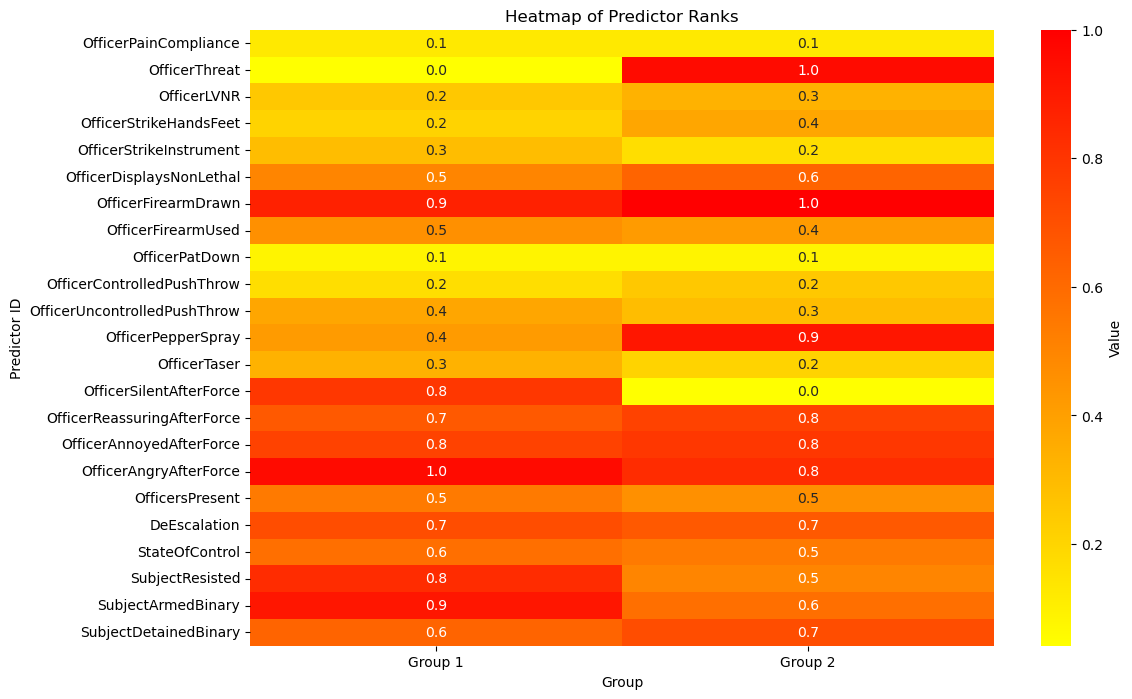

In [1649]:
#plot heat map to visually compare predictor ranks in both group
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

original = comparing_normalized_ranks.data

# Drop rows with any NaN values
original = original.dropna()
# Transpose the DataFrame to get the desired orientation
original = original.T

# Create the heatmap DataFrame
heatmap_data = pd.DataFrame({
    'Predictor': original.iloc[1,:].values,  
    'Group 1': original.iloc[2,:],      
    'Group 2': original.iloc[3,:]       
})

# Ensure all data is numeric for heatmap plotting, but keep 'Predictor' as object
heatmap_data[['Group 1', 'Group 2']] = heatmap_data[['Group 1', 'Group 2']].apply(pd.to_numeric, errors='coerce')

# Drop rows where all 'Group 1' and 'Group 2' values are NaN
heatmap_data = heatmap_data.dropna(how='all', subset=['Group 1', 'Group 2'])

original_predictor_names = heatmap_data['Predictor'].values

# Replace 'Predictor' with a sequence of integers starting from 1
heatmap_data['Predictor'] = range(1, len(heatmap_data) + 1)

# Set 'Predictor' column as index
heatmap_data.set_index('Predictor', inplace=True)

plt.figure(figsize=(12, 8))  
ax = sns.heatmap(heatmap_data, cmap='autumn_r', annot=True, fmt='.1f', cbar_kws={'label': 'Value'})
ax.set_yticklabels(original_predictor_names, rotation=0)  # rotation=0 for horizontal labels
plt.title('Heatmap of Predictor Ranks')
plt.xlabel('Group')
plt.ylabel('Predictor ID')
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

In [1650]:
#compute rank correlation coefficient and p-values of Group-rank
from scipy.stats import spearmanr
original = comparing_normalized_ranks.data
group1ranks = pd.to_numeric(original['Group 1'])
group2ranks = pd.to_numeric(original['Group 2'])
rho, p_value = spearmanr(group1ranks.dropna(), group2ranks.dropna())

In [1651]:
rho

0.4575098814229249

In [1652]:
p_value

0.028159575196551767

In [1639]:
#redefine predictors & response
predictors = Group2_data.drop(columns = ['PQ1','PQ2','PQ3','PQ5','PQ6','PQ7','PQ8','PQ10','PQ11'])
response = Group2_data['PQ6']

In [1640]:
#run permutation testing on optimal model to deduce significance of MCC score
from sklearn import svm, datasets
model_SVC = svm.SVC()
import itertools
import time
from sklearn.metrics import matthews_corrcoef
import pandas as pd

num_permutations=500 #number of times to permute (shuffle) PQ# responses
observed_mcc=0.510 #computed MCC of reduced model for PQ# with specified cutoff value
permuted_mcc_scores=[] #initialize a list to store the MCC scores after each of the permutations of PQ#
bestmodel = svm.SVC(kernel='linear',C=0.7)#,gamma=0.01,degree=3)

#store MCC scores for each of our reduced model predictions in a data frame
for permutation in range(num_permutations): #for each permutation
    
    permuted_response=np.random.permutation(response) #permute the row entries of 'PQ#' in reduced data    
    print(f"Permutation {permutation + 1} - Permuted Response: {permuted_response}")
    
    #create training/test split on reduced data set
    X_train, X_test, y_train, y_test = train_test_split(predictors, permuted_response, test_size = 0.250)
    y_train=pd.DataFrame(y_train,columns=['PQ6'])
    
    #train model on reduced data with permuted response
    bestmodel.fit(X_train, np.ravel(y_train.transpose().to_numpy())) 
                                  
    #make predictions for response using trained model. 
    pred=bestmodel.predict(X_test) 

    #store MCC score with permuted response
    MCC=matthews_corrcoef(y_test,pred) 
    permuted_mcc_scores.append(MCC) #add this MCC score to our list 
    print(f"Permutation {permutation + 1} - MCC: {MCC:.4f}")
    
#compute the p-value(the probability that the observed MCC of 0.598 occured by random chance) 
    #null: MCC!=observed_mcc 
    #alternative: MCC=observed_mcc
    #p<0.05 means we reject the null and MCC=observed_mcc (our MCC is significant - didn't occur by random chance)
    #p>=0.05 means we accept the null and MCC!=observed_mcc (our MCC is not significant - did occur by random chance)
permuted_mcc_scores = np.array(permuted_mcc_scores)
p_value = np.mean(permuted_mcc_scores >= observed_mcc) #compute the proportion of permuted MCC scores that are at least as large as the observed MCC
p_value = round(p_value, 100)  #round to 100 decimal places
scientific_notation = "{:.10e}".format(p_value) #display in scientific notation

Permutation 1 - Permuted Response: [1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 

In [1641]:
p_value

0.0

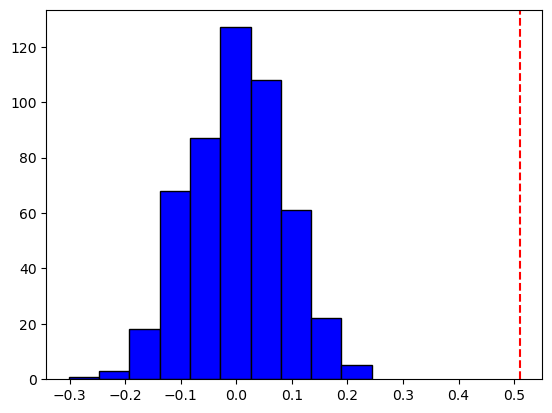

In [1644]:
#visualize results from permutation testing
import matplotlib.pyplot as plt

plt.hist(permuted_mcc_scores, bins=10, color='blue', edgecolor='black')
plt.axvline(x=observed_mcc, color='red', linestyle='--', label='Observed Value')
plt.savefig('MCC_permutation_test_Group2.png')
plt.show()

In [ ]:
#old code 

In [ ]:
#get column number (indexed from 0) of var for preprocessing
data.columns.get_loc("PQ2")

In [ ]:
#pre-processing

#re-define ordinal outcome variable (PQ#) as binary using cut-off
for i in range(1273):
    if data.iloc[i,9]<=3:
        data.iloc[i,21]=0
    else:
        data.iloc[i,21]=1

#re-define categorical predictors as several classes of binary

#Coding Groups: Group 1: Watch/Annotate/Perceptions ,, Group 2: Annotate/Watch/Perceptions
Group1=pd.DataFrame(columns=['Group1'],index=range(1273))
for i in range(1273):
    if data.iloc[i,0]==1:
        Group1.loc[i]=1
    else: 
        Group1.loc[i]=0
        
Group2=pd.DataFrame(columns=['Group2'],index=range(1273))
for i in range(1273):
    if data.iloc[i,0]==2:
        Group2.loc[i]=1
    else:
        Group2.loc[i]=0

#Suspectrace
WhiteSuspect=pd.DataFrame(columns=['WhiteSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,1]==1:
        WhiteSuspect.loc[i]=1
    else:
        WhiteSuspect.loc[i]=0

BlackSuspect=pd.DataFrame(columns=['BlackSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,1]==2:
        BlackSuspect.loc[i]=1
    else:
        BlackSuspect.loc[i]=0

AmerIndAlNatSuspect=pd.DataFrame(columns=['AmerIndAlNatSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,1]==3:
        AmerIndAlNatSuspect.loc[i]=1
    else:
        AmerIndAlNatSuspect.loc[i]=0

NatHiPacIsSuspect=pd.DataFrame(columns=['NatHiPacIsSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,1]==4:
        NatHiPacIsSuspect.loc[i]=1
    else:
        NatHiPacIsSuspect.loc[i]=0
        
AsianSuspect=pd.DataFrame(columns=['AsianSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,1]==5:
        AsianSuspect.loc[i]=1
    else:
        AsianSuspect.loc[i]=0
        
MidEasternSuspect=pd.DataFrame(columns=['MidEasternSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,1]==6:
        MidEasternSuspect.loc[i]=1
    else:
        MidEasternSuspect.loc[i]=0
        
UnknownRaceSuspect=pd.DataFrame(columns=['UnknownRaceSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,1]==7:
        UnknownRaceSuspect.loc[i]=1
    else:
        UnknownRaceSuspect.loc[i]=0

OtherRaceSuspect=pd.DataFrame(columns=['OtherRaceSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,1]==8:
        OtherRaceSuspect.loc[i]=1
    else:
        OtherRaceSuspect.loc[i]=0

Suspectrace=pd.concat([WhiteSuspect,BlackSuspect,AmerIndAlNatSuspect,NatHiPacIsSuspect,AsianSuspect,MidEasternSuspect,UnknownRaceSuspect,OtherRaceSuspect],axis=1)

#Suspectgender
UnknownSuspectGender=pd.DataFrame(columns=['UnknownSuspectGender'],index=range(1273))
for i in range(1273):
    if data.iloc[i,2]==8:
        UnknownSuspectGender.loc[i]=1
    else:
        UnknownSuspectGender.loc[i]=0

FemaleSuspect=pd.DataFrame(columns=['FemaleSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,2]==0:
        FemaleSuspect.loc[i]=1
    else:
        FemaleSuspect.loc[i]=0
        
MaleSuspect=pd.DataFrame(columns=['MaleSuspect'],index=range(1273))
for i in range(1273):
    if data.iloc[i,2]==1:
        MaleSuspect.loc[i]=1
    else:
        MaleSuspect.loc[i]=0

Suspectgender=pd.concat([UnknownSuspectGender,FemaleSuspect,MaleSuspect],axis=1)
        
#TypeOfForce
OffVerbalThreat=pd.DataFrame(columns=['OffVerbalThreat'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==1:
        OffVerbalThreat.loc[i]=1
    else:
        OffVerbalThreat.loc[i]=0

OffPatDown=pd.DataFrame(columns=['OffPatDown'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==2:
        OffPatDown.loc[i]=1
    else:
        OffPatDown.loc[i]=0

OffFirmGrip=pd.DataFrame(columns=['OffFirmGrip'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==3:
        OffFirmGrip.loc[i]=1
    else:
        OffFirmGrip.loc[i]=0
        
OffPainCompliance=pd.DataFrame(columns=['OffPainCompliance'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==4:
        OffPainCompliance.loc[i]=1
    else:
        OffPainCompliance.loc[i]=0
        
OffControlPushThrow=pd.DataFrame(columns=['OffControlPushThrow'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==5:
        OffControlPushThrow.loc[i]=1
    else:
        OffControlPushThrow.loc[i]=0

OffUncontrolPushThrow=pd.DataFrame(columns=['OffUncontrolPushThrow'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==6:
        OffUncontrolPushThrow.loc[i]=1
    else:
        OffUncontrolPushThrow.loc[i]=0

OffLVNR=pd.DataFrame(columns=['OffLVNR'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==7:
        OffLVNR.loc[i]=1
    else:
        OffLVNR.loc[i]=0

OffStrikeHandsFeet=pd.DataFrame(columns=['OffStrikeHandsFeet'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==8:
        OffStrikeHandsFeet.loc[i]=1
    else:
        OffStrikeHandsFeet.loc[i]=0

OffStrikeInstrument=pd.DataFrame(columns=['OffStrikeInstrument'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==9:
        OffStrikeInstrument.loc[i]=1
    else:
        OffStrikeInstrument.loc[i]=0
        
OffUnknownForce=pd.DataFrame(columns=['OffUnknownForce'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==11:
        OffUnknownForce.loc[i]=1
    else:
        OffUnknownForce.loc[i]=0
        
OffTaser=pd.DataFrame(columns=['OffTaser'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==10:
        OffTaser.loc[i]=1
    else:
        OffTaser.loc[i]=0

OffPepperSpray=pd.DataFrame(columns=['OffPepperSpray'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==12:
        OffPepperSpray.loc[i]=1
    else:
        OffPepperSpray.loc[i]=0
        
OffFirearmDrawn=pd.DataFrame(columns=['OffFirearmDrawn'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==13:
        OffFirearmDrawn.loc[i]=1
    else:
        OffFirearmDrawn.loc[i]=0
        
OffFirearmUsed=pd.DataFrame(columns=['OffFirearmUsed'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==14:
        OffFirearmUsed.loc[i]=1
    else:
        OffFirearmUsed.loc[i]=0
        
OffDisplayNonLethal=pd.DataFrame(columns=['OffDisplayNonLethal'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==15:
        OffDisplayNonLethal.loc[i]=1
    else:
        OffDisplayNonLethal.loc[i]=0
        
OffUnknownForce2=pd.DataFrame(columns=['OffUnknownForce2'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==16:
        OffUnknownForce2.loc[i]=1
    else:
        OffUnknownForce2.loc[i]=0
        
OffOtherForce=pd.DataFrame(columns=['OffOtherForce'],index=range(1273))
for i in range(1273):
    if data.iloc[i,4]==17:
        OffOtherForce.loc[i]=1
    else:
        OffOtherForce.loc[i]=0
        
TypeOfForce=pd.concat([OffVerbalThreat,OffPatDown,OffFirmGrip,OffPainCompliance,OffControlPushThrow,OffUncontrolPushThrow,OffLVNR,OffStrikeHandsFeet,OffStrikeInstrument,OffUnknownForce,OffTaser,OffPepperSpray,OffFirearmDrawn,OffFirearmUsed,OffDisplayNonLethal,OffUnknownForce2,OffOtherForce],axis=1)
        
#SuspectArmed
SuspectUnarmed=pd.DataFrame(columns=['SuspectUnarmed'],index=range(1273))
for i in range(1273):
    if data.iloc[i,12]==0:
        SuspectUnarmed.loc[i]=1
    else:
        SuspectUnarmed.loc[i]=0
        
SuspectDisplayWeapon=pd.DataFrame(columns=['SuspectDisplayWeapon'],index=range(1273))
for i in range(1273):
    if data.iloc[i,12]==1:
        SuspectDisplayWeapon.loc[i]=1
    else:
        SuspectDisplayWeapon.loc[i]=0
        
SuspectUsingWeapon=pd.DataFrame(columns=['SuspectUsingWeapon'],index=range(1273))
for i in range(1273):
    if data.iloc[i,12]==2:
        SuspectUsingWeapon.loc[i]=1
    else:
        SuspectUsingWeapon.loc[i]=0
        
OffFoundSuspectWeapon=pd.DataFrame(columns=['OffFoundSuspectWeapon'],index=range(1273))
for i in range(1273):
    if data.iloc[i,12]==3:
        OffFoundSuspectWeapon.loc[i]=1
    else:
        OffFoundSuspectWeapon.loc[i]=0
        
SuspectWeaponOther=pd.DataFrame(columns=['SuspectWeaponOther'],index=range(1273))
for i in range(1273):
    if data.iloc[i,12]==4:
        SuspectWeaponOther.loc[i]=1
    else:
        SuspectWeaponOther.loc[i]=0

Suspectarmed=pd.concat([SuspectUnarmed,SuspectDisplayWeapon,SuspectUsingWeapon,OffFoundSuspectWeapon,SuspectWeaponOther],axis=1)

#TypeofDeEscalationTech
OffNoDeEscalation=pd.DataFrame(columns=['OffNoDeEscalation'],index=range(1273))
for i in range(1273):
    if data.iloc[i,14]==0:
        OffNoDeEscalation.loc[i]=1
    else:
        OffNoDeEscalation.loc[i]=0
        
OffPhysicalDeEscalation=pd.DataFrame(columns=['OffPhysicalDeEscalation'],index=range(1273))
for i in range(1273):
    if data.iloc[i,14]==1:
        OffPhysicalDeEscalation.loc[i]=1
    else:
        OffPhysicalDeEscalation.loc[i]=0
        
OffVerbalDeEscalation=pd.DataFrame(columns=['OffVerbalDeEscalation'],index=range(1273))
for i in range(1273):
    if data.iloc[i,14]==2:
        OffVerbalDeEscalation.loc[i]=1
    else:
        OffVerbalDeEscalation.loc[i]=0
        
OffOtherDeEscalation=pd.DataFrame(columns=['OffOtherDeEscalation'],index=range(1273))
for i in range(1273):
    if data.iloc[i,14]==3:
        OffOtherDeEscalation.loc[i]=1
    else:
        OffOtherDeEscalation.loc[i]=0
        
TypeofDeEscalationTechnique=pd.concat([OffNoDeEscalation,OffPhysicalDeEscalation, OffVerbalDeEscalation, OffOtherDeEscalation],axis=1)

#OverallAssessment
OffSilentAfterForce=pd.DataFrame(columns=['OffSilentAfterForce'],index=range(1273))
for i in range(1273):
    if data.iloc[i,17]==1:
        OffSilentAfterForce.loc[i]=1
    else:
        OffSilentAfterForce.loc[i]=0
        
OffReassuringAfterForce=pd.DataFrame(columns=['OffReassuringAfterForce'],index=range(1273))
for i in range(1273):
    if data.iloc[i,17]==2:
        OffReassuringAfterForce.loc[i]=1
    else:
        OffReassuringAfterForce.loc[i]=0
        
OffAnnoyedAfterForce=pd.DataFrame(columns=['OffAnnoyedAfterForce'],index=range(1273))
for i in range(1273):
    if data.iloc[i,17]==3:
        OffAnnoyedAfterForce.loc[i]=1
    else:
        OffAnnoyedAfterForce.loc[i]=0
        
OffAngryAfterForce=pd.DataFrame(columns=['OffAngryAfterForce'],index=range(1273))
for i in range(1273):
    if data.iloc[i,17]==4:
        OffAngryAfterForce.loc[i]=1
    else:
        OffAngryAfterForce.loc[i]=0
        
OffOtherAfterForce=pd.DataFrame(columns=['OffOtherAfterForce'],index=range(1273))
for i in range(1273):
    if data.iloc[i,17]==5:
        OffOtherAfterForce.loc[i]=1
    else:
        OffOtherAfterForce.loc[i]=0
        
OverallAssessment=pd.concat([OffSilentAfterForce,OffReassuringAfterForce,OffAnnoyedAfterForce,OffAngryAfterForce,OffOtherAfterForce],axis=1)

#DetainCiteArrest
NoArrest=pd.DataFrame(columns=['NoArrest'],index=range(1273))
for i in range(1273):
    if data.iloc[i,18]==0:
        NoArrest.loc[i]=1
    else:
        NoArrest.loc[i]=0
        
DetainedNoCuffs=pd.DataFrame(columns=['DetainedNoCuffs'],index=range(1273))
for i in range(1273):
    if data.iloc[i,18]==1:
        DetainedNoCuffs.loc[i]=1
    else:
        DetainedNoCuffs.loc[i]=0
        
DetainedCuffs=pd.DataFrame(columns=['DetainedCuffs'],index=range(1273))
for i in range(1273):
    if data.iloc[i,18]==2:
        DetainedCuffs.loc[i]=1
    else:
        DetainedCuffs.loc[i]=0
        
VerbalStatementArrest=pd.DataFrame(columns=['VerbalStatementArrest'],index=range(1273))
for i in range(1273):
    if data.iloc[i,18]==3:
        VerbalStatementArrest.loc[i]=1
    else:
        VerbalStatementArrest.loc[i]=0
        
PhysicalArrestCuffs=pd.DataFrame(columns=['PhysicalArrestCuffs'],index=range(1273))
for i in range(1273):
    if data.iloc[i,18]==4:
        PhysicalArrestCuffs.loc[i]=1
    else:
        PhysicalArrestCuffs.loc[i]=0
        
GivenCitation=pd.DataFrame(columns=['GivenCitation'],index=range(1273))
for i in range(1273):
    if data.iloc[i,18]==5:
        GivenCitation.loc[i]=1
    else:
        GivenCitation.loc[i]=0
        
OtherDetainment=pd.DataFrame(columns=['OtherDetainment'],index=range(1273))
for i in range(1273):
    if data.iloc[i,18]==6:
        OtherDetainment.loc[i]=1
    else:
        OtherDetainment.loc[i]=0
        
DetainCiteArrest=pd.concat([NoArrest,DetainedNoCuffs,DetainedCuffs,VerbalStatementArrest,PhysicalArrestCuffs,GivenCitation,OtherDetainment],axis=1)
        
#Systematic Racism Q 6
PushTooFast=pd.DataFrame(columns=['PushTooFast'],index=range(1273))
for i in range(1273):
    if data.iloc[i,95]==1:
        PushTooFast.loc[i]=0
    else:
        PushTooFast.loc[i]=1
        
GoingTooSlow=pd.DataFrame(columns=['GoingTooSlow'],index=range(1273))
for i in range(1273):
    if data.iloc[i,95]==2:
        GoingTooSlow.loc[i]=0
    else:
        GoingTooSlow.loc[i]=1
        
MovingRightSpeed=pd.DataFrame(columns=['MovingRightSpeed'],index=range(1273))
for i in range(1273):
    if data.iloc[i,95]==3:
        MovingRightSpeed.loc[i]=0
    else:
        MovingRightSpeed.loc[i]=1

symracismq6=pd.concat([PushTooFast,GoingTooSlow,MovingRightSpeed],axis=1)
        
#CoderPolitics
CoderLiberal=pd.DataFrame(columns=['CoderLiberal'],index=range(1273))
for i in range(1273):
    if data.iloc[i,100]==1:
        CoderLiberal.loc[i]=1
    else:
        CoderLiberal.loc[i]=0
        
CoderIndependent=pd.DataFrame(columns=['CoderIndependent'],index=range(1273))
for i in range(1273):
    if data.iloc[i,100]==2:
        CoderIndependent.loc[i]=1
    else:
        CoderIndependent.loc[i]=0
        
CoderConservative=pd.DataFrame(columns=['CoderConservative'],index=range(1273))
for i in range(1273):
    if data.iloc[i,100]==3:
        CoderConservative.loc[i]=1
    else:
        CoderConservative.loc[i]=0
        
CoderPoliticsOther=pd.DataFrame(columns=['CoderPoliticsOther'],index=range(1273))
for i in range(1273):
    if data.iloc[i,100]==4:
        CoderPoliticsOther.loc[i]=1
    else:
        CoderPoliticsOther.loc[i]=0
        
Coderpolitics=pd.concat([CoderLiberal,CoderIndependent,CoderConservative,CoderPoliticsOther],axis=1)

#Coderrace
WhiteCoder=pd.DataFrame(columns=['WhiteCoder'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==1:
        WhiteCoder.loc[i]=1
    else:
        WhiteCoder.loc[i]=0
        
AfricanBlackCoder=pd.DataFrame(columns=['AfricanBlackCoder'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==2:
        AfricanBlackCoder.loc[i]=1
    else:
        AfricanBlackCoder.loc[i]=0
        
HispanicLatinoCoder=pd.DataFrame(columns=['HispanicLatinoCoder'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==3:
        HispanicLatinoCoder.loc[i]=1
    else:
        HispanicLatinoCoder.loc[i]=0
        
AsianCoder=pd.DataFrame(columns=['AsianCoder'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==4:
        AsianCoder.loc[i]=1
    else:
        AsianCoder.loc[i]=0
        
NativeAmericanCoder=pd.DataFrame(columns=['NativeAmericanCoder'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==5:
        NativeAmericanCoder.loc[i]=1
    else:
        NativeAmericanCoder.loc[i]=0
        
MidEastNorthAfrCoder=pd.DataFrame(columns=['MidEastNorthAfrCoder'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==6:
        MidEastNorthAfrCoder.loc[i]=1
    else:
        MidEastNorthAfrCoder.loc[i]=0
        
PacificIslanderCoder=pd.DataFrame(columns=['PacificIslanderCoder'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==7:
        PacificIslanderCoder.loc[i]=1
    else:
        PacificIslanderCoder.loc[i]=0
        
OtherCoderrace=pd.DataFrame(columns=['OtherCoderrace'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==8:
        OtherCoderrace.loc[i]=1
    else:
        OtherCoderrace.loc[i]=0
        
NoDiscloseCoderrace=pd.DataFrame(columns=['NoDiscloseCoderrace'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==9:
        NoDiscloseCoderrace.loc[i]=1
    else:
        NoDiscloseCoderrace.loc[i]=0
        
WhiteandHispLatinoCoder=pd.DataFrame(columns=['WhiteandHispLatinoCoder'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==10:
        WhiteandHispLatinoCoder.loc[i]=1
    else:
        WhiteandHispLatinoCoder.loc[i]=0
        
WhiteandMidEastNorAfrCoder=pd.DataFrame(columns=['WhiteandMidEastNorAfrCoder'],index=range(1273))
for i in range(1273):
    if data.iloc[i,101]==11:
        WhiteandMidEastNorAfrCoder.loc[i]=1
    else:
        WhiteandMidEastNorAfrCoder.loc[i]=0
        
Coderrace=pd.concat([WhiteCoder,AfricanBlackCoder,HispanicLatinoCoder,AsianCoder,NativeAmericanCoder,MidEastNorthAfrCoder,PacificIslanderCoder,OtherCoderrace,NoDiscloseCoderrace,WhiteandHispLatinoCoder,WhiteandMidEastNorAfrCoder],axis=1)

#CoderCorps
WSUCorpsCurrent=pd.DataFrame(columns=['WSUCorpsCurrent'],index=range(1273))
for i in range(1273):
    if data.iloc[i,104]==1:
        WSUCorpsCurrent.loc[i]=1
    else:
        WSUCorpsCurrent.loc[i]=0
        
WSUCorpsPrevious=pd.DataFrame(columns=['WSUCorpsPrevious'],index=range(1273))
for i in range(1273):
    if data.iloc[i,104]==2:
        WSUCorpsPrevious.loc[i]=1
    else:
        WSUCorpsPrevious.loc[i]=0
        
WSUNoCorps=pd.DataFrame(columns=['WSUNoCorps'],index=range(1273))
for i in range(1273):
    if data.iloc[i,104]==0:
        WSUNoCorps.loc[i]=1
    else:
        WSUNoCorps.loc[i]=0
        
CoderCorps=pd.concat([WSUCorpsCurrent,WSUCorpsPrevious,WSUNoCorps],axis=1)

In [ ]:
#re-construct data with binary variables

#drop categorical predictors
data=data.drop(['Suspectrace','Group','Suspectgender','TypeOfForce','SuspectArmed','TypeofDeEscalationTech','OverallAssessment','DetainCiteArrest','symracismq6','Coderpolitics','Coderrace','Codercorps'],axis=1)

#concatentate new data frame with classes of binaries predictors
data=pd.concat([data.reset_index(drop=True),Suspectrace.reset_index(drop=True), Suspectgender.reset_index(drop=True), TypeOfForce.reset_index(drop=True), Suspectarmed.reset_index(drop=True), TypeofDeEscalationTechnique.reset_index(drop=True), OverallAssessment.reset_index(drop=True), DetainCiteArrest.reset_index(drop=True), symracismq6.reset_index(drop=True), Coderpolitics.reset_index(drop=True), Coderrace.reset_index(drop=True), CoderCorps.reset_index(drop=True),Group1.reset_index(drop=True),Group2.reset_index(drop=True)],axis=1)

#see data
data.shape

In [ ]:
data.head(10)

In [ ]:
#find max and min of data
max_cols=data.columns[data.max()==data.max().max()]
max_cols

In [ ]:
#rescale columns in cols_to_be_scaled to be from [-1,1]
data['LengthofVideoInSeconds'] = data['LengthofVideoInSeconds'] / data['LengthofVideoInSeconds'].max()
data['LengthofVideoInSeconds']

In [ ]:
#begin k-fold cross-validation

#select explanatory and response vars
X=data.drop(['PQ1'], axis=1) #explanatory vars
y=data['PQ1'] #response

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.214)

In [ ]:
#define subset of data to build folds out of
y_train=pd.DataFrame(y_train,columns=['PQ1'])
y_train.head()
y_train.shape

training_data=pd.concat([X_train,y_train],axis=1)
training_data.shape

In [ ]:
#reset indices of training data from 1 instead of 0 
training_data.reset_index(drop = True, inplace = True)
training_data.index=training_data.index + 1
training_data.head(10)

In [ ]:
#define parameters for grid search and five-fold cross-validation results dictionary
from sklearn import svm, datasets
model_SVC = svm.SVC()
import itertools
import time
from sklearn.metrics import matthews_corrcoef

parameters = {'kernel':['poly'],'C':[0.001,0.01,0.1,0.3,0.5,0.7], 'gamma':[0.001,0.01,0.1,0.3,0.5,0.7],'degree':[2,3]}
cv_result_dict={'params' : list(itertools.product(*[parameters[k] for k in parameters])),
               'fold_1_predictions':[],
               'fold_2_predictions':[],
               'fold_3_predictions':[],
               'fold_4_predictions':[],
               'fold_5_predictions':[],
               }
cv_result_dict

In [ ]:
#run 5-fold CV on training data (1000 samps)
for param in cv_result_dict['params']: #for each combination of parameters
    this_model=svm.SVC(kernel=param[0],C=param[1],gamma=param[2],degree=param[3]) #define our model
    for fold in range(1,6,1): #for each of the five folds (size 200 each)
        #define our testing set
        curr_split_test_data=training_data.iloc[(fold)*200-200:(fold)*200,:]
        #define our training set
        curr_split_train_data=training_data.loc[training_data.index.difference(curr_split_test_data.index)]
        #fit our model to the training set
        this_model.fit(curr_split_train_data.drop(columns=['PQ11']),
                       curr_split_train_data['PQ11'])
        #test our model on the testing set
        pred=this_model.predict(curr_split_test_data.drop(columns=['PQ11']))
        #store the predictions of our model on this fold 
        cv_result_dict['fold_{}_predictions'.format(fold)].append(pred)
        print("Fold {}, Param: {}".format(fold, param))
        #store predictions in list

In [ ]:
#visualize CV results in adata frame
cv_result_table=pd.DataFrame(cv_result_dict)
cv_result_table

In [ ]:
#store each set of model predictions in a data frame
this_model_predictions=np.empty((len(cv_result_table),1000))
for i in range(len(cv_result_table)):
    cv_result_table.iloc[i,1]=np.reshape(cv_result_table.iloc[i,1],(1,200),order='C')
    cv_result_table.iloc[i,2]=np.reshape(cv_result_table.iloc[i,2],(1,200),order='C')
    cv_result_table.iloc[i,3]=np.reshape(cv_result_table.iloc[i,3],(1,200),order='C')
    cv_result_table.iloc[i,4]=np.reshape(cv_result_table.iloc[i,4],(1,200),order='C')
    cv_result_table.iloc[i,5]=np.reshape(cv_result_table.iloc[i,5],(1,200),order='C')
    concat = np.concatenate((cv_result_table.iloc[i,1],cv_result_table.iloc[i,2],cv_result_table.iloc[i,3],cv_result_table.iloc[i,4],cv_result_table.iloc[i,5]),axis=0)
    concat = np.hstack(concat)
    concat = np.reshape(concat,(1,1000))
    this_model_predictions[i]=concat
this_model_predictions = pd.DataFrame(data=this_model_predictions).transpose()
this_model_predictions.index=this_model_predictions.index+1
this_model_predictions

In [ ]:
#store MCC scores for each of our model predictions in a data frame
from sklearn.metrics import matthews_corrcoef
Model_MCC_Scores=np.empty((1,len(cv_result_table)))

for j in range(len(cv_result_table)):
    mcc=matthews_corrcoef(training_data['PQ11'],this_model_predictions.iloc[:,j])
    Model_MCC_Scores[0,j]=mcc
    
Model_MCC_Scores=pd.DataFrame(Model_MCC_Scores).transpose()
Model_MCC_Scores.columns = ['MCC_score']
Model_MCC_Scores

In [ ]:
#construct MCC Score Table for All Models in Grid Search
Model=pd.DataFrame(cv_result_table['params'])
Model.columns = ['Model']
Model_MCC_Table=pd.concat([Model, Model_MCC_Scores],axis=1)
pd.set_option('display.max_rows', None)
Model_MCC_Table

In [ ]:
#save MCC Score table as pdf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=Model_MCC_Table.values,colLabels=Model_MCC_Table.columns,loc='center')

pp = PdfPages("linear_scores.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [ ]:
value_counts = data['PQ11'].value_counts()
print(value_counts)

In [ ]:
#run variable dropping on Group 1 responses

#reindex indices of test data from 0 
X_test = X_test.reset_index()
del X_test['index']
y_test = y_test.reset_index()
del y_test['index']

#store best model from grid search
from sklearn import svm, datasets
model_SVC = svm.SVC()
import itertools
import time
from sklearn.metrics import matthews_corrcoef

bestmodel = svm.SVC(kernel='linear',C=0.3)#, gamma=0.001,degree=2)

#dropping variables to select predictors for best model

#initialize max_MCC_score list
max_MCC_score=[]

#initialize predictor_removed list
predictor_removed=[]

#initialize number of predictors list
num_predictors=[]

while len(num_predictors)!=177: 

    #initialize MCC_score list
    MCC_score=[]
    #initialize predictor list
    predictor=[]

    #for every predictor 
    for i in range(X_test.shape[1]):
                
        #remove the predictor from data sets
        ColumnName=X_test.columns[i] #store the column name of ith predictor in X_test 
        PREDICTORTEST=X_test[ColumnName] #define the column of ith predictor in X_test 
        PREDICTORTRAIN=X_train[ColumnName] #define the column of ith predictor in X_train
        print(f"Testing predictor {i+1}/{X_test.shape[1]}: {ColumnName}")
        print(f"Shape of PREDICTORTEST: {PREDICTORTEST.shape}")  # Print the shape
        X_test=X_test.drop(ColumnName, axis=1) #remove ith predictor from testing (copy) data 
        X_train=X_train.drop(ColumnName,axis=1) #remove ith predictor from training data
        
        #store predictor in predictor list
        predictor.append(ColumnName) #store name of ith predictor in predictor list 
        
        #train model on train set
        bestmodel.fit(X_train, np.ravel(y_train.transpose().to_numpy())) #train our best model on the training data
        
        #test model on test set
        pred=bestmodel.predict(X_test) #test our best model on unseen testing data 

        #store MCC score after removal 
        MCC=matthews_corrcoef(y_test,pred) #compute MCC score for our new model with ith predictor removed
        MCC_score.append(MCC) #add this MCC score to our list in entry i
        
        #add ith predictor back to data and repeat with next predictor
        X_test.insert(i, ColumnName, PREDICTORTEST)
        X_train.insert(i, ColumnName, PREDICTORTRAIN)
    
    #select jth MCC score that is the highest in MCC_score list
    j=MCC_score.index(max(MCC_score))
    
    #identify jth predictor corresponding to max MCC score 
    max_pred=predictor[j]
    max_ColumnName=X_test.columns[j] #store the column name of jth predictor in X_test 
    max_PREDICTORTEST=X_test[max_ColumnName] #define the column of jth predictor in X_test 
    
    #store jth MCC score in max_MCC_score list
    max_MCC_score.append(max(MCC_score))
    
    #store jth predictor in predictor_removed list
    predictor_removed.append(max_pred)
    
    #remove jth predictor from train and test data
    X_test=X_test.drop(max_ColumnName, axis=1) #remove jth predictor from testing data 
    X_train=X_train.drop(max_ColumnName,axis=1) #remove jth predictor from training data
    print(f"Number of predictors left after removal: {X_test.shape[1]}")
    
    #compute length of new data and store in number of predictors list
    num_predictors.append(X_test.shape[1])
    
#append last remaining predictor to predictor_removed list
predictor_removed.append(X_train.columns[0])
#append MCC=0 to max_MCC_score since removing the last predictor results in a MCC zero
max_MCC_score.append(0)
#append "0" to num_predictors since we're removing the last predictor
num_predictors.append(0)
    
#concatenate predictor_removed, max_MCC_score, number of predictors, and percent yes/no lists as column vectors into one table 
predictor_removed_df=pd.DataFrame(predictor_removed,columns=['Predictor Removed'])
max_MCC_score_df=pd.DataFrame(max_MCC_score,columns=['MCC Score After Removal'])
num_predictors_df=pd.DataFrame(num_predictors,columns=['Predictors Left'])
Results=pd.concat([predictor_removed_df,max_MCC_score_df,num_predictors_df], axis=1)
#invert 2nd column of PQ1_model to get ranks
Results.iloc[:,2]=Results.iloc[::-1,2].values
Results.iloc[:,2]=Results.iloc[:,2]+1
#rename 2nd column as rank (order in which vars are removed)
Results = Results.rename(columns={'Predictor Removed': 'Predictor Removed', 'MCC Score After Removal': 'MCC Score After Removal', 'Predictors Left':'Rank'})

Results

In [ ]:
#change directory to store Reuslts
import os
os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/March Research Update 2024/Variable Dropping")

In [ ]:
#save Results table as a pdf

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Assuming Results is your DataFrame containing the data for the table

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=Results.values, colLabels=Results.columns, loc='center')

# Add the table to the figure
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1.2, 1.2)  # Adjust the scale as needed

# Save the figure as a PDF
with PdfPages("PQ11_Var_Drop.pdf") as pdf:
    pdf.savefig(fig, bbox_inches='tight')

plt.close(fig)

In [ ]:
#obtain only relevant preds
Relevant_Preds_PQ11=Results.iloc[165-1:178,]
Relevant_Preds_PQ11

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=Relevant_Preds_PQ11.values, colLabels=Relevant_Preds_PQ11.columns, loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1.2, 1.2)  

with PdfPages("Relevant_Preds_PQ11.pdf") as pdf:
    pdf.savefig(fig, bbox_inches='tight')
plt.close(fig)

In [ ]:
#visualize relevant predictors table
Relevant_Preds_PQ11

In [ ]:
#store predictors and response for relevant preds
predictors=data[Relevant_Preds_PQ11.iloc[:,0]]
response=data["PQ11"]

In [ ]:
#check preds match table 
predictors.head(10)

In [ ]:
#check response is correct
response.head(10)

In [ ]:
#computation p-values of MCC (use permutation testing)
from sklearn import svm, datasets
model_SVC = svm.SVC()
import itertools
import time
from sklearn.metrics import matthews_corrcoef
import pandas as pd

num_permutations=500 #number of times to permute (shuffle) PQ# responses
observed_mcc=0. #computed MCC of reduced model for PQ# with specified cutoff value
permuted_mcc_scores=[] #initialize a list to store the MCC scores after each of the permutations of PQ#
bestmodel = svm.SVC(kernel='linear',C=0.01)#,gamma=0.001,degree=2)#best model for PQ# with specified cutoff value

#store MCC scores for each of our reduced model predictions in a data frame
for permutation in range(num_permutations): #for each permutation
    
    permuted_response=np.random.permutation(response) #permute the row entries of 'PQ#' in reduced data    
    print(f"Permutation {permutation + 1} - Permuted Response: {permuted_response}")
    
    #create training/test split on reduced data set
    X_train, X_test, y_train, y_test = train_test_split(predictors, permuted_response, test_size = 0.214)
    y_train=pd.DataFrame(y_train,columns=['PQ11'])
    
    #train model on reduced data with permuted response
    bestmodel.fit(X_train, np.ravel(y_train.transpose().to_numpy())) 
                                  
    #make predictions for response using trained model. 
    pred=bestmodel.predict(X_test) 

    #store MCC score with permuted response
    MCC=matthews_corrcoef(y_test,pred) 
    permuted_mcc_scores.append(MCC) #add this MCC score to our list 
    print(f"Permutation {permutation + 1} - MCC: {MCC:.4f}")
    
#compute the p-value(the probability that the observed MCC of 0.598 occured by random chance) 
    #null: MCC!=observed_mcc 
    #alternative: MCC=observed_mcc
    #p<0.05 means we reject the null and MCC=observed_mcc (our MCC is significant - didn't occur by random chance)
    #p>=0.05 means we accept the null and MCC!=observed_mcc (our MCC is not significant - did occur by random chance)
permuted_mcc_scores = np.array(permuted_mcc_scores)
p_value = np.mean(permuted_mcc_scores >= observed_mcc) #compute the proportion of permuted MCC scores that are at least as large as the observed MCC
p_value = round(p_value, 100)  #round to 100 decimal places
scientific_notation = "{:.10e}".format(p_value) #display in scientific notation
p_value 

In [ ]:
#plot i.e. histogram of permuted_mcc_scores
import matplotlib.pyplot as plt

plt.hist(permuted_mcc_scores, bins=10, color='blue', edgecolor='black')
plt.axvline(x=observed_mcc, color='red', linestyle='--', label='Observed Value')
#plt.savefig('MCC_Permutation_Testing_PQ11.png')
plt.show()

In [ ]:
#run var drop on PQS with either grouping as relevant predictors

In [ ]:
#list of relevant preds from PQ's with either group as relevant
PQ1_relevant_preds=['GivenCitation', 'symracismq1', 'PoliceQ8', 'symracismq3', 'PQ5',
       'Group2', 'PQ10', 'tactful', 'AfricanBlackCoder', 'PQ7',
       'LocNoiseLevel', 'GoingTooSlow', 'tender', 'conventional', 'PQ3',
       'symracismq7', 'childlike', 'PoliceQ2', 'MaleSuspect',
       'symracismq5', 'PQ4', 'OffPhysicalDeEscalation', 'PQ8', 'PQ6']

PQ2_relevant_preds=['Group2', 'AfricanBlackCoder', 'SuspectDisplayWeapon', 'PQ11',
       'PhysicalArrestCuffs', 'PushTooFast', 'WhiteCoder', 'athletic',
       'VerbalStatementArrest', 'PQ9', 'independent', 'forceful',
       'symracismq8', 'PoliceQ6', 'GivenCitation', 'ambitious', 'solemn',
       'ForceLocation', 'cheeful', 'PoliceQ1', 'PoliceQ5', 'WSUNoCorps',
       'sincere', 'OffSilentAfterForce', 'dominant', 'strongpersonality',
       'less5mintocode', 'analytical', 'theatrical',
       'OffPhysicalDeEscalation', 'DetainedNoCuffs', 'tactful',
       'DetainedCuffs', 'loveschildren', 'symracismq3', 'competitive',
       'PoliceQ4', 'Bystanders', 'PoliceQ9', 'selfsufficient',
       'unsystematic', 'senstivetoothersneeds', 'obs', 'aggressive',
       'eagertosoothhurt', 'PQ6', 'PQ3', 'unpredictable', 'Resistance',
       'PQ1', 'PoliceQ10', 'OfficersPresent', 'conscientious', 'PQ5',
       'PQ7', 'PQ10', 'flatterable', 'feminine', 'reliable',
       'sympathetic', 'leadershipskills', 'compassionate', 'liable',
       'warm', 'tender', 'gullible', 'adaptable', 'individualistic',
       'PoliceQ8']

PQ4_relevant_preds=['WSUCorpsPrevious', 'PoliceQ9', 'Group2', 'willingtotakerisks',
       'happy', 'feminine', 'analytical', 'willingtotakestand',
       'eagertosoothhurt', 'inefficient', 'doesntuseharshlang',
       'loveschildren', 'loyal', 'symracismq7', 'dominant',
       'DetainedCuffs', 'unsystematic', 'PoliceQ1',
       'UnknownSuspectGender', 'SuspectUnarmed', 'less5mintocode',
       'MaleSuspect', 'OffSilentAfterForce', 'CoderLiberal', 'PoliceQ2',
       'WhiteCoder', 'AfricanBlackCoder', 'HispanicLatinoCoder',
       'WSUCorpsCurrent', 'WSUNoCorps', 'Group1', 'actsasaleader',
       'symracismq4', 'conventional', 'PoliceQ3', 'liable',
       'selfsufficient', 'warm', 'solemn', 'bsri', 'PQ1', 'PQ8',
       'athletic', 'individualistic', 'symracismq3',
       'VerbalStatementArrest', 'competitive', 'SuspectDisplayWeapon',
       'softspoken', 'senstivetoothersneeds', 'gullible', 'tender',
       'PoliceQ4', 'compassionate', 'PoliceQ5', 'PQ6',
       'makesdecisioneasy', 'flatterable', 'tactful', 'sympathetic',
       'PoliceQ7', 'PoliceQ6', 'PoliceQ10', 'PoliceQ8', 'gentle', 'PQ2',
       'truthful', 'understanding', 'friendly', 'adaptable', 'ambitious',
       'PQ3', 'obs']

PQ7_relevant_preds=['Group2', 'SuspectDisplayWeapon', 'PushTooFast',
       'SusNegEmotionalState', 'softspoken', 'OffPhysicalDeEscalation',
       'ambitious', 'PQ10', 'WSUNoCorps', 'PoliceQ3', 'PoliceQ1',
       'VerbalStatementArrest', 'DetainedCuffs', 'WhiteSuspect',
       'PhysicalArrestCuffs', 'WhiteCoder', 'warm', 'gullible',
       'individualistic', 'PQ5', 'PQ11', 'obs', 'dominant',
       'CoderLiberal', 'symracismq2', 'PoliceQ10', 'unsystematic',
       'AfricanBlackCoder', 'PQ9', 'doesntuseharshlang', 'PQ6', 'PQ3']

PQ8_relevant_preds=['Group2', 'OffPhysicalDeEscalation', 'WSUNoCorps', 'PQ11']

PQ10_relevant_preds=['WSUCorpsPrevious', 'PQ6', 'PQ8', 'loveschildren', 'symracismq5',
       'DetainedNoCuffs', 'ambitious', 'MovingRightSpeed',
       'WSUCorpsCurrent', 'analytical', 'DetainedCuffs',
       'AfricanBlackCoder', 'VerbalStatementArrest', 'PushTooFast', 'PQ2',
       'Group1', 'CoderLiberal', 'Group2', 'doesntuseharshlang',
       'WSUNoCorps', 'childlike', 'PoliceQ2', 'GoingTooSlow', 'PQ11',
       'PQ9']

PQ11_relevant_preds=['Group2', 'DetainedCuffs', 'softspoken', 'Resistance', 'liable',
       'conventional', 'PQ8', 'OfficersPresent', 'LocNoiseLevel', 'obs',
       'PQ6', 'affectionate', 'PQ10', 'PQ4']

In [ ]:
#group1 responses 
data1=data.loc[data['Group1']==1,:]
#group2 responses 
data2=data.loc[data['Group2']==1,:]

#group1 (group2) responses with relevant vars
data1_relevant_vars_only=pd.concat([data1[PQ2_relevant_preds],data1['PQ2']],axis=1)
data2_relevant_vars_only=pd.concat([data2[PQ2_relevant_preds],data2['PQ2']],axis=1)
#check num preds is correct
data1_relevant_vars_only.shape[1]

In [ ]:
#compute training and testing subsets for variable-dropping on group 1 (or group 2)
X=data2_relevant_vars_only.drop(['PQ2'], axis=1) #explanatory vars
y=data2_relevant_vars_only['PQ2'] #response

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.262)#0.259 group1, 0.262 group2

#construct training data
y_train=pd.DataFrame(y_train,columns=['PQ2'])
y_train.head()
y_train.shape
training_data=pd.concat([X_train,y_train],axis=1)
training_data.shape
training_data

In [ ]:
#run variable dropping on Group 1 (or Group 2) responses
#reindex indices of test data from 0 
X_test = X_test.reset_index()
del X_test['index']
y_test = y_test.reset_index()
del y_test['index']

#store best model from grid search
from sklearn import svm, datasets
model_SVC = svm.SVC()
import itertools
import time
from sklearn.metrics import matthews_corrcoef

bestmodel = svm.SVC(kernel='poly', C=0.001, gamma=0.01,degree=3)

#dropping variables to select predictors for best model

#initialize percent yes (no) response list
percent_yes=[]

#initialize max_MCC_score list
max_MCC_score=[]

#initialize predictor_removed list
predictor_removed=[]

#initialize number of predictors list
num_predictors=[]

while len(num_predictors)!=(data1_relevant_vars_only.shape[1]-2): 

    #initialize MCC_score list
    MCC_score=[]
    #initialize predictor list
    predictor=[]

    #for every predictor 
    for i in range(X_test.shape[1]):
                
        #remove the predictor from data sets
        ColumnName=X_test.columns[i] #store the column name of ith predictor in X_test 
        PREDICTORTEST=X_test[ColumnName] #define the column of ith predictor in X_test 
        PREDICTORTRAIN=X_train[ColumnName] #define the column of ith predictor in X_train
        print(f"Testing predictor {i+1}/{X_test.shape[1]}: {ColumnName}")
        print(f"Shape of PREDICTORTEST: {PREDICTORTEST.shape}")  # Print the shape
        X_test=X_test.drop(ColumnName, axis=1) #remove ith predictor from testing (copy) data 
        X_train=X_train.drop(ColumnName,axis=1) #remove ith predictor from training data
        
        #store predictor in predictor list
        predictor.append(ColumnName) #store name of ith predictor in predictor list 
        
        #train model on train set
        bestmodel.fit(X_train, np.ravel(y_train.transpose().to_numpy())) #train our best model on the training data
        
        #test model on test set
        pred=bestmodel.predict(X_test) #test our best model on unseen testing data 

        #store MCC score after removal 
        MCC=matthews_corrcoef(y_test,pred) #compute MCC score for our new model with ith predictor removed
        MCC_score.append(MCC) #add this MCC score to our list in entry i
        
        #add ith predictor back to data and repeat with next predictor
        X_test.insert(i, ColumnName, PREDICTORTEST)
        X_train.insert(i, ColumnName, PREDICTORTRAIN)
    
    #select jth MCC score that is the highest in MCC_score list
    j=MCC_score.index(max(MCC_score))
    
    #identify jth predictor corresponding to max MCC score 
    max_pred=predictor[j]
    max_ColumnName=X_test.columns[j] #store the column name of jth predictor in X_test 
    max_PREDICTORTEST=X_test[max_ColumnName] #define the column of jth predictor in X_test 
    
    #store jth MCC score in max_MCC_score list
    max_MCC_score.append(max(MCC_score))
    
    #store jth predictor in predictor_removed list
    predictor_removed.append(max_pred)
    
    #remove jth predictor from train and test data
    X_test=X_test.drop(max_ColumnName, axis=1) #remove jth predictor from testing data 
    X_train=X_train.drop(max_ColumnName,axis=1) #remove jth predictor from training data
    print(f"Number of predictors left after removal: {X_test.shape[1]}")
    
    #compute length of new data and store in number of predictors list
    num_predictors.append(X_test.shape[1])
    
    #compute store percent yes and no resp after var removed
    bestmodel.fit(X_train,np.ravel(y_train.transpose().to_numpy()))
    pred=bestmodel.predict(X_test)
    percent_yes.append((pred[pred==1].sum()/len(pred))*100)

#append last remaining predictor to predictor_removed list
predictor_removed.append(X_train.columns[0])
#append MCC=0 to max_MCC_score since removing the last predictor results in a MCC zero
max_MCC_score.append(0)
#append "0" to num_predictors since we're removing the last predictor
num_predictors.append(0)
#append percnet yes (no) responses with last var in training data
bestmodel.fit(X_train,np.ravel(y_train.transpose().to_numpy()))
pred=bestmodel.predict(X_test)
percent_yes.append((pred[pred==1].sum()/len(pred))*100)

#concatenate predictor_removed, max_MCC_score, and number of predictors lists as column vectors into one table 
predictor_removed_df=pd.DataFrame(predictor_removed,columns=['Predictor Removed'])
max_MCC_score_df=pd.DataFrame(max_MCC_score,columns=['MCC Score After Removal'])
num_predictors_df=pd.DataFrame(num_predictors,columns=['Predictors Left'])
percent_yes_df=pd.DataFrame(percent_yes,columns=['Percent Yes Predictions'])
Results=pd.concat([predictor_removed_df,max_MCC_score_df,num_predictors_df,percent_yes_df], axis=1)
#invert 2ndd column of PQ1_model to get ranks
Results.iloc[:,2]=Results.iloc[::-1,2].values
Results.iloc[:,2]=Results.iloc[:,2]+1
#rename 2ndd column as rank (order in which vars are removed)
Results = Results.rename(columns={'Predictor Removed': 'Predictor Removed', 'MCC Score After Removal': 'MCC Score After Removal', 'Predictors Left':'Rank', 'Percent Yes Predictions': '% Yes Predictions After Removal'})
Results['% No Predictions After Removal']=100-Results['% Yes Predictions After Removal']
Results

In [ ]:
#change dir..
import os
os.chdir("C:/Users/eliza/OneDrive/Documents/Perceptions of UofF Research/March Research Update 2024/Variable Dropping/on group responses separately")

In [ ]:
#visualize variable dropping results Group 1 (or Group 2)
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

Results_Group2=Results

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Results_Group2

In [ ]:
!pip install dataframe_image

In [ ]:
#store relevant preds from variable dropping results Group 1 (or Group 2)
import seaborn as sns
import dataframe_image as dfi 

def highlight_rows(row, relevant_row_min):
    if row.name >= relevant_row_min:
        return 'background-color: rgba(255, 255, 0, 0.5)'
    else:
        return ['']*len(row)

# Set the row number from which you want to highlight
relevant_row_min = len(Results_Group2) - 45

# Apply the styling function to the DataFrame
styled_df_2 = Results_Group2.style.apply(highlight_rows, relevant_row_min=relevant_row_min, axis=1)

# Display the styled DataFrame
styled_df_2

dfi.export(styled_df_2,'Relevant_Pred_Results_PQ2_Group2.png')

In [ ]:
#define relevant predictors in each group
PQ2_relevant_preds_Group1=np.array(Results_Group1.iloc[21:Results_Group1.shape[0],0]) 
PQ2_relevant_preds_Group2=np.array(Results_Group2.iloc[24:Results_Group2.shape[0],0]) 
PQ2_relevant_preds_Group1=pd.DataFrame(PQ2_relevant_preds_Group1)
PQ2_relevant_preds_Group2=pd.DataFrame(PQ2_relevant_preds_Group2)

In [ ]:
#create a table to compare ranks
predictor_removed=Results_Group1['Predictor Removed'].values
predictor_removed=pd.DataFrame(predictor_removed,columns=['Predictor Removed'])
rank_Group1=Results_Group1['Rank'].values
rank_Group1=pd.DataFrame(rank_Group1, columns=['Rank Group 1'])

rank_Group2=[]
for i in range(predictor_removed.shape[0]):
    pred=predictor_removed.iloc[i,0]
    row_index=Results_Group2.loc[Results_Group2['Predictor Removed']==pred].index[0]
    rank_Group2.append(Results_Group2.iloc[row_index,2])

rank_Group2=pd.DataFrame(rank_Group2,columns=['Rank Group 2'])
rank_comparison_group_PQ2=pd.concat([predictor_removed, rank_Group1, rank_Group2],axis=1)

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=rank_comparison_group_PQ2.values, colLabels=rank_comparison_group_PQ2.columns, loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1.2, 1.2)  

with PdfPages("rank_comparison_group_PQ2.pdf") as pdf:
    pdf.savefig(fig, bbox_inches='tight')
plt.close(fig)

In [ ]:
#compute spearman's rank correlation coefficient
from scipy.stats import spearmanr
rho, p_value = spearmanr(rank_comparison_group_PQ2['Rank Group 1'], rank_comparison_group_PQ2['Rank Group 2'])
rho

In [ ]:
#identify relevant preds in common between both groups
PQ2_preds_in_common=np.intersect1d(PQ2_relevant_preds_Group1,PQ2_relevant_preds_Group2)
PQ2_preds_in_common=pd.DataFrame(PQ2_preds_in_common,columns=['Pred in Common'])
PQ2_preds_in_common

In [ ]:
#construct data for map
mat_ranks=pd.DataFrame(index=range(2),columns=[f'{col}' for col in PQ2_preds_in_common['Pred in Common']])
Group=pd.DataFrame(index=range(2),columns=['Group'])
mat_ranks=pd.concat([Group,mat_ranks],axis=1)
mat_ranks['Group']=[1,2]

for i in range(PQ2_preds_in_common.shape[0]):
    pred=PQ2_preds_in_common.iloc[i,0]
    row_index=rank_comparison_group_PQ2.loc[rank_comparison_group_PQ2['Predictor Removed']==pred].index[0]
    mat_ranks.iloc[0,i+1]=rank_comparison_group_PQ2.iloc[row_index,1]
    mat_ranks.iloc[1,i+1]=rank_comparison_group_PQ2.iloc[row_index,2]
    
mat_ranks.iloc[:, 1:] = mat_ranks.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
mat_ranks

In [ ]:
#produce heat map results
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(mat_ranks.set_index('Group'), annot=False, fmt=".2f", cbar_kws={'label': 'Rank of Negative Influence (out of 69) '}, linewidths=.5, vmin=1, vmax=69, cmap="crest", annot_kws={"size": 8}, square=False)
for i, row in enumerate(heatmap.get_yticklabels()):
    for j, col in enumerate(heatmap.get_xticklabels()):
        mcc = mat_ranks.iloc[i, j + 1]
        if not pd.isna(mcc):  
            text_color = 'white' if mcc > 0.5 else 'black'
            heatmap.text(j + 0.5, i + 0.5, f'{mcc:.2f}', ha='center', va='center', color=text_color, fontsize=8, rotation='vertical')
            heatmap.set_yticklabels(['1', '2'], rotation=0)
plt.title('PQ2:Do you believe the subject''s suspected offense is serious?')
plt.savefig('PQ2_heatmap_normalized_rank_comparisons', bbox_inches='tight')
plt.show()